In [11]:
import tensorflow as tf
import tfplot
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
sess = tf.InteractiveSession()

In [2]:
def execute_op_as_image(op):
    """
    Evaluate the given `op` and return the content PNG image as `PIL.Image`.

    - If op is a plot op (e.g. RGBA Tensor) the image or
      a list of images will be returned
    - If op is summary proto (i.e. `op` was a summary op),
      the image content will be extracted from the proto object.
    """
    print ("Executing: " + str(op))
    ret = sess.run(op)
    plt.close()

    if isinstance(ret, np.ndarray):
        if len(ret.shape) == 3:
            # single image
            return Image.fromarray(ret)
        elif len(ret.shape) == 4:
            return [Image.fromarray(r) for r in ret]
        else:
            raise ValueError("Invalid rank : %d" % len(ret.shape))

    elif isinstance(ret, (str, bytes)):
        from io import BytesIO
        s = tf.Summary()
        s.ParseFromString(ret)
        ims = []
        for i in range(len(s.value)):
            png_string = s.value[i].image.encoded_image_string
            im = Image.open(BytesIO(png_string))
            ims.append(im)
        plt.close()
        if len(ims) == 1: return ims[0]
        else: return ims

    else:
        raise TypeError("Unknown type: " + str(ret))

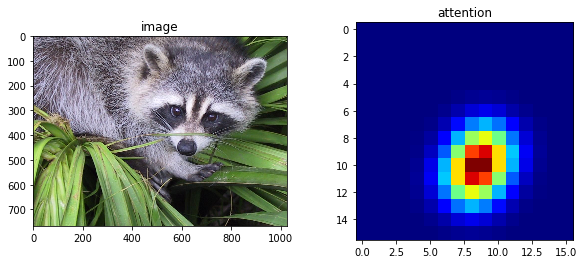

In [12]:
def fake_attention():
    attention = np.zeros([16, 16], dtype=np.float32)
    attention[(11, 8)] = 1.0
    attention[(9, 9)] = 1.0
    attention = sp.ndimage.filters.gaussian_filter(attention, sigma=1.5)
    return attention

sample_image = sp.misc.face()
attention_map = fake_attention()

# display the data
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].imshow(sample_image); axs[0].set_title('image')
axs[1].imshow(attention_map, cmap='jet'); axs[1].set_title('attention')
plt.show()